## Base dados : Embarcações e Frotas

- Origem dados Frotas : http://dados.gov.br/dataset/frota1/resource/963fd2c6-9eb0-4566-bd9d-972257887faa
- Origem dados embarcação: http://dados.gov.br/dataset/frota1/resource/791d1f3e-c3b7-4d75-aa7a-5348444d3b3b <br><br>
Acessado em 5/7/2020, atualizados em 4/6/2020

In [1]:
import pandas as pd
%matplotlib inline

## 0. Embarcações Cadastradas

In [2]:
frota_emb = pd.read_csv('data/frotaembarcacao.txt', header = 0, sep= ';')

### 0.1 Renomeando colunas

In [3]:
frota_emb.columns

Index(['IDEmbarcacao', 'Nome da Embarcação', 'Ano da Construção da Embarcação',
       'Codigo do Tipo de Material do Casco', 'Tipo de Material do Casco',
       'Codigo do Tipo da Embarcação', 'Tipo de Embarcação',
       'Codigo do País Atual', 'Codigo do País de Origem', 'Boca', 'Calado',
       'Comprimento', 'TPB'],
      dtype='object')

In [4]:
colunas_frota_emb = ['id_embarcacao', 'nome_embarcacao', 'ano_construcao_embarcacao',
       'cod_tipo_material_casco', 'tipo_material_casco','codigo_tipo_embarcacao', 'tipo_embarcacao',
       'cod_pais_atual', 'cod_pais_origem', 'boca', 'calado','comprimento', 'tpb']

In [5]:
frota_emb.columns = colunas_frota_emb

In [6]:
frota_emb.columns

Index(['id_embarcacao', 'nome_embarcacao', 'ano_construcao_embarcacao',
       'cod_tipo_material_casco', 'tipo_material_casco',
       'codigo_tipo_embarcacao', 'tipo_embarcacao', 'cod_pais_atual',
       'cod_pais_origem', 'boca', 'calado', 'comprimento', 'tpb'],
      dtype='object')

### 0.2 Principais tipos de embarcações

In [7]:
### Tipos de Embarcação
frota_emb['tipo_embarcacao'].value_counts()

BALSA                                           1970
REBOCADOR/EMPURRADOR                            1746
LANCHA                                          1352
BARCAÇA                                          693
SUPRIDORES DE PLATAFORMAS MARÍTIMAS (SUPPLY)     365
BOTE                                             251
CHATA                                            244
PASSAGEIRO/CARGA GERAL                           172
FLUTUANTE                                        146
PASSAGEIROS                                      135
GRANELEIRO                                       101
TRAINEIRA                                        101
CARGA GERAL                                       89
PETROLEIRO                                        81
OUTRAS EMBARCAÇÕES                                73
FERRY BOAT                                        72
DRAGA                                             45
PORTA CONTEINER                                   34
CÁBREA                                        

### 0.3  Filtro tipo_embarcacao = 'REBOCADOR/EMPURRADOR'

In [8]:
frota_emb_reb = frota_emb[frota_emb['tipo_embarcacao']=='REBOCADOR/EMPURRADOR']

### 0.4  Idade Rebocadores

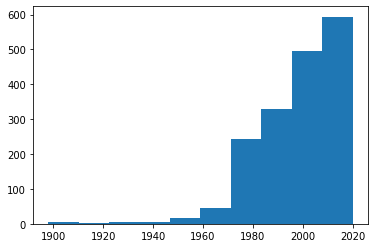

In [37]:
frota_emb_reb['ano_construcao_embarcacao'].hist(grid = False)

In [10]:
#Campos Nulos
frota_emb_reb.isnull().sum()

id_embarcacao                  0
nome_embarcacao                0
ano_construcao_embarcacao     10
cod_tipo_material_casco       73
tipo_material_casco           73
codigo_tipo_embarcacao         0
tipo_embarcacao                0
cod_pais_atual                 0
cod_pais_origem                0
boca                          41
calado                       195
comprimento                   22
tpb                           49
dtype: int64

## 1. Frota de Rebocadores

In [11]:
frota = pd.read_csv('data/frota.txt', header = 0, sep= ';')

In [12]:
frota.head(2)

,Ano da Outorga,DataFinal,MesFinal,AnoFinal,Tipo de Navegação Outorgada,ID_TipoNavegacaoOutorgada,IDEmbarcacao,Outorga Ok?,Propriedade,STEmbarcacao,Descrição do Tipo de Transporte,Região Hidrográfica,Razão Social,IDTipoNavegacaoEmbarcacao,Tipo de Navegação da Embarcação
0,2015,30/09/2015,set,2015,Interior,1,48103,1,Própria,-1,Travessia de Passageiros,Região Hidrográfica Atlântico Sul,ARTHURISMO TRANSPORTE MARÍTIMO LTDA-ME,2,Apoio Portuário
1,2015,30/11/2015,nov,2015,Interior,1,48103,1,Própria,-1,Travessia de Passageiros,Região Hidrográfica Atlântico Sul,ARTHURISMO TRANSPORTE MARÍTIMO LTDA-ME,2,Apoio Portuário


### 1.1 Renomeando colunas

In [13]:
frota.columns

Index(['Ano da Outorga', 'DataFinal', 'MesFinal', 'AnoFinal',
       'Tipo de Navegação Outorgada', 'ID_TipoNavegacaoOutorgada',
       'IDEmbarcacao', 'Outorga Ok?', 'Propriedade', 'STEmbarcacao',
       'Descrição do Tipo de Transporte', 'Região Hidrográfica',
       'Razão Social', 'IDTipoNavegacaoEmbarcacao',
       'Tipo de Navegação da Embarcação'],
      dtype='object')

In [14]:
frota_colunas = ['ano_outorga', 'data_final', 'mes_final', 'ano_final',
       'tipo_nav_outorgadada', 'id_tipo_nav_outorgadada','id_embarcacao', 'status_outorga', 'propriedade', 'st_embarcacao',
       'desc_tipo_transp', 'reg_hidrografica','razao_social', 'id_tipo_nav_embarcacao','tipo_nav_embarcaca']

In [15]:
frota.columns = frota_colunas

In [16]:
frota.columns

Index(['ano_outorga', 'data_final', 'mes_final', 'ano_final',
       'tipo_nav_outorgadada', 'id_tipo_nav_outorgadada', 'id_embarcacao',
       'status_outorga', 'propriedade', 'st_embarcacao', 'desc_tipo_transp',
       'reg_hidrografica', 'razao_social', 'id_tipo_nav_embarcacao',
       'tipo_nav_embarcaca'],
      dtype='object')

### 1.2 Buscando empresa dona do rebocador (data mais recente)

In [17]:
frota_reb = pd.merge(frota_emb_reb, frota, on='id_embarcacao')

In [18]:
## Buscando só rebocadores que pertencem a empresa
frota_reb = frota_reb[frota_reb['propriedade']=='Própria']

In [19]:
frota_reb.head(2)

,id_embarcacao,nome_embarcacao,ano_construcao_embarcacao,cod_tipo_material_casco,tipo_material_casco,codigo_tipo_embarcacao,tipo_embarcacao,cod_pais_atual,cod_pais_origem,boca,...,tipo_nav_outorgadada,id_tipo_nav_outorgadada,status_outorga,propriedade,st_embarcacao,desc_tipo_transp,reg_hidrografica,razao_social,id_tipo_nav_embarcacao,tipo_nav_embarcaca
0,8649,SN ARARUAMA,1984.0,1.0,Aço,51,REBOCADOR/EMPURRADOR,BR,BR,8,...,Apoio Marítimo,4,1,Própria,-1,NaN,NaN,SULNORTE SERVIÇOS MARÍTIMOS LTDA.,2,Apoio Portuário
1,8649,SN ARARUAMA,1984.0,1.0,Aço,51,REBOCADOR/EMPURRADOR,BR,BR,8,...,Apoio Marítimo,4,1,Própria,-1,NaN,NaN,SULNORTE SERVIÇOS MARÍTIMOS LTDA.,4,Apoio Marítimo


In [20]:
frota_reb['id_embarcacao'].nunique()

1423

In [21]:
frota_reb.columns

Index(['id_embarcacao', 'nome_embarcacao', 'ano_construcao_embarcacao',
       'cod_tipo_material_casco', 'tipo_material_casco',
       'codigo_tipo_embarcacao', 'tipo_embarcacao', 'cod_pais_atual',
       'cod_pais_origem', 'boca', 'calado', 'comprimento', 'tpb',
       'ano_outorga', 'data_final', 'mes_final', 'ano_final',
       'tipo_nav_outorgadada', 'id_tipo_nav_outorgadada', 'status_outorga',
       'propriedade', 'st_embarcacao', 'desc_tipo_transp', 'reg_hidrografica',
       'razao_social', 'id_tipo_nav_embarcacao', 'tipo_nav_embarcaca'],
      dtype='object')

### 1.3 Empresa x rebocadores

In [22]:
#Data mais recente
frota_recente = frota_reb[['id_embarcacao','data_final']].groupby('id_embarcacao').max()

In [23]:
col_info = ['id_embarcacao','data_final', 'nome_embarcacao', 'ano_construcao_embarcacao','tipo_embarcacao','cod_pais_origem',
            'razao_social']

In [24]:
#Removendo duplicações
frota_reb_filtro = frota_reb[col_info].drop_duplicates()


In [25]:
frota_reb_info = pd.merge(frota_recente, frota_reb_filtro, on=['id_embarcacao','data_final'])

In [26]:
frota_reb_info.shape

(1423, 7)

In [27]:
empresas = frota_reb_info['razao_social'].value_counts()
empresas = empresas.reset_index()

In [28]:
empresas.to_csv('resultados/empresas_rebocadores.csv',index=False)

### Validação com as informações de Frota da Wilson Sons e Camorim

In [29]:
df  = pd.read_csv('data/empresas_rebocadores_detalhes.csv')

In [30]:
df.columns = ['nome_embarcacao','bollard_pull','bhp','ano','classe','empresa','eixos']

In [31]:
df['nome_embarcacao'] = df['nome_embarcacao'].str.strip()
df['nome_embarcacao'] = df['nome_embarcacao'].str.lower()

In [32]:
frota_reb_info['nome_embarcacao'] = frota_reb_info['nome_embarcacao'].str.strip()
frota_reb_info['nome_embarcacao'] = frota_reb_info['nome_embarcacao'].str.lower()

In [33]:
valores = pd.merge(df, frota_reb_info, on='nome_embarcacao')

In [34]:
df.shape

(123, 7)

In [35]:
valores[valores['empresa']=='Wilson Sons']['razao_social'].value_counts()

SAVEIROS, CAMUYRANO - SERVIÇOS MARÍTIMOS S/A    60
NAVEMAR TRANSPORTES E COMÉRCIO MARÍTIMO LTDA     2
CONSTRAN S/A - CONSTRUÇÕES E COMÉRCIO            1
SAAM TOWAGE BRASIL S.A.                          1
PETRÓLEO BRASILEIRO S.A - PETROBRAS              1
Name: razao_social, dtype: int64

In [36]:
valores[valores['empresa']=='Camorim']['razao_social'].value_counts()

CAMORIM SERVIÇOS MARÍTIMOS LTDA                 23
STARNAV SERVIÇOS MARÍTIMOS LTDA.                 8
DIALCAR ESTALEIRO E SERVIÇOS MARÍTIMOS LTDA.     1
CAMORIM OFFSHORE SERVIÇOS MARÍTIMOS LTDA.        1
MAXXIMUS SERVIÇOS MARÍTIMOS LTDA                 1
Name: razao_social, dtype: int64

### Conclusão:
* Rebocadores que estão disponiveis como Frota nos sites das empresas , ja não são mais propriedade da empresa
* Numeros de rebocadores divulgados pelas empresas divergem dos números disponibilizados pela ANAQ